# Notebook 16: Upload Genbank Assembly QC<a class="tocSkip">

**Upload the final reassembled fastas as a submission**
    
    
**The steps that we will take are:**
1. Import Statements & Global Variable Definitions
2. Read In Data Tables
3. Upload QC Data
4. Extract QC Metrics
5. Plot QC Metrics

# Import Statements & Global Variable Definitions

In [1]:
%%capture
%pip install --upgrade --no-cache-dir git+https://github.com/DataBiosphere/ssds

In [1]:
import terra_notebook_utils as tnu
import terra_pandas as tp
import pandas as pd
import os
from ssds import deployment
from pprint import pprint
import gcsfs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Function Definitions

In [2]:
def clean_quast_string(input_string):
    input_string = str(input_string)
    rstrip_str   = input_string.rstrip()
    rtn_str      = rstrip_str.split(' ')[-1]
    
    return rtn_str

## Global Variable Definitions

In [3]:
## submission_id is generated by uuid (gives unique ID to each submission)
submission_id       = "C57EAEDF-E4DD-4773-B79A-2178BF2B84CB"

## submission_name lends some recognizability to the submission
submission_name     = "GENBANK_AUTOMATED_QC"

ds = deployment._GSStaging(google_billing_project="firecloud-cgl")   # _GSStaging()
destintation_bucket = "gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf" # _GSStaging()

## Where the submission files will actually land (we may add one directory level later)
dest_full_path      = os.path.join(destintation_bucket, "submissions", submission_id + "--" + submission_name)

## Set Environment Variables

In [4]:
# Get the Google billing project name and workspace name
PROJECT = os.environ['WORKSPACE_NAMESPACE']
WORKSPACE =os.path.basename(os.path.dirname(os.getcwd()))
bucket = os.environ['WORKSPACE_BUCKET'] + "/"

# Verify that we've captured the environment variables
print("Billing project: " + PROJECT)
print("Workspace: " + WORKSPACE)
print("Workspace storage bucket: " + bucket)

Billing project: human-pangenome-ucsc
Workspace: HPRC_Reassembly
Workspace storage bucket: gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/


# Read In Data Tables

## Read In Genbank QC Samples

In [5]:
genbank_sample_df = tp.table_to_dataframe("genbank_qc_sample_id")

genbank_sample_df.head()

,asmgeneMaternalSummary,quastPaternalSummary,mat_ilmn,pat_fasta,child_ilmn,is_male,allResults,asmgenePaternalSummary,quastMaternalSummary,merylSampleDB,merquryQV,pat_ilmn,dipcallVCF,mat_fasta,merylMaternalHapmer,dipcallBED,merylPaternalHapmer,yakSummary
genbank_qc_sample_id_id,,,,,,,,,,,,,,,,,,
HG002,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG00438,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,False,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG005,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,NaN,NaN,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,NaN,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,NaN,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...
HG00621,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG00673,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199

# Upload QC Data
## Download Then Extract QC Tarballs

In [10]:
! mkdir qc_data
%cd qc_data

/home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data


In [23]:
for index, row in genbank_sample_df.iterrows():
    
    sample_name = row.name
    
    ## Copy down QC results
    results_tar_fp = row['allResults']
    ! gsutil cp {results_tar_fp} .

    ## Unzip and remove original tar.gz file
    qc_tar_fn = os.path.basename(results_tar_fp)
    ! tar xzvf {qc_tar_fn}
    ! rm {qc_tar_fn}
    
    #filename, file_extension = os.path.splitext(qc_tar_fn)
    filename     = os.path.basename(qc_tar_fn)
    index_of_dot = filename.index('.')
    folder_name  = filename[:index_of_dot]

    ## Move to a more standard name
    ! mv {folder_name} {sample_name}/assembly_qc

Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/2e1162a9-0166-4d6f-96e0-0e7988e1f5ec/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG002_StandardQC.tar.gz...
\ [1 files][  3.9 GiB/  3.9 GiB]   43.1 MiB/s                                   
Operation completed over 1 objects/3.9 GiB.                                      
HG002_StandardQC/
HG002_StandardQC/asmgene/
HG002_StandardQC/asmgene/pat/
HG002_StandardQC/asmgene/pat/HG002.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG002_StandardQC/asmgene/mat/
HG002_StandardQC/asmgene/mat/HG002.maternal.f1_assembly_v2_genbank.gene_stats.txt
HG002_StandardQC/quast/
HG002_StandardQC/quast/pat/
HG002_StandardQC/quast/pat/report.html
HG002_StandardQC/quast/pat/report.pdf
HG002_StandardQC/quast/pat/transposed_report.tex
HG002_StandardQC/quast/pat/quast.log
HG002_StandardQC/quast/pat/report.tex
HG002_StandardQC/quast/pat/basic_stats/
HG002_StandardQC/quast/pat/basic_stats/HG002

HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.spectra-asm.fl.png
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
HG002_StandardQC/merqury/paternal_not_maternal.hist
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.spectra-asm.st.png
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.completeness.stats
HG002_StandardQC/merqury/maternal_not_paternal.hist
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf
HG002_StandardQC/merqury/HG002.f1_assembly_v2_genbank.merqury.altHap.qv
HG00

HG00438_StandardQC/merqury/inherited_hapmers.fl.png
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.completeness.stats
HG00438_StandardQC/merqury/paternal_not_maternal.hist
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG00438_StandardQC/merqury/paternal.inherited.hist
HG00438_StandardQC/merqury/shrd.inherited.hist
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf
HG00438_StandardQC/merqury/HG00438.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG00438_StandardQC/merq

mv: cannot move 'HG005_StandardQC' to 'HG005/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/c0ec3d09-4c6e-49f8-8311-fe012d850fa4/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG00621_StandardQC.tar.gz...
| [1 files][  3.8 GiB/  3.8 GiB]   46.2 MiB/s                                   
Operation completed over 1 objects/3.8 GiB.                                      
HG00621_StandardQC/
HG00621_StandardQC/asmgene/
HG00621_StandardQC/asmgene/mat/
HG00621_StandardQC/asmgene/mat/HG00621.maternal.f1_assembly_v2_genbank.gene_stats.txt
HG00621_StandardQC/asmgene/pat/
HG00621_StandardQC/asmgene/pat/HG00621.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG00621_StandardQC/merqury/
HG00621_StandardQC/merqury/HG00621.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG00621_StandardQC/merqury/HG00621.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG00621_StandardQC/merqury/HG00621

HG00621_StandardQC/quast/pat/report.tex
HG00621_StandardQC/quast/pat/transposed_report.tsv
HG00621_StandardQC/quast/pat/report.tsv
HG00621_StandardQC/quast/pat/quast.log
HG00621_StandardQC/quast/pat/transposed_report.tex
HG00621_StandardQC/quast/pat/report.pdf
HG00621_StandardQC/dipcall/
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.dip.bed
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.pair.vcf.gz
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap2.bam
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap1.var.gz
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap2.var.gz.vst
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.tmp.bed
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap1.paf.gz.log
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap2.bed
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap2.sam.gz.log
HG00621_StandardQC/dipcall/HG00621.f1_assembly_v2_genbank.hap1.paf.gz
HG00621_Stand

HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.bed
HG00673_StandardQC/merqury/inherited_hapmers.fl.png
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.only.hist
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.spectra-asm.hist
HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.altHap.maternal.hapme

HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.dist_only.hist
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.altHap.only.hist
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.st.png
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG00733_StandardQC/merqury/HG00733.f1_assembly_v2_genbank.merqury.spectra-cn.hist
HG00733_StandardQC/merqury/HG00733.

HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.paf.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.paf.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.sam.gz.log
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.var.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.bam
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.bed
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.pair.vcf.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.paf.gz.log
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.var.gz.vst
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.var.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.sam.gz.log
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.bed
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.dip.vcf.gz
HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.paf.gz.log
HG00735_St

mv: cannot move 'HG00735_StandardQC' to 'HG00735/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/f8fcd8e6-bd97-4933-a16f-13deedf7e28c/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG00741_StandardQC.tar.gz...
| [1 files][  3.6 GiB/  3.6 GiB]   41.6 MiB/s                                   
Operation completed over 1 objects/3.6 GiB.                                      
HG00741_StandardQC/
HG00741_StandardQC/quast/
HG00741_StandardQC/quast/mat/
HG00741_StandardQC/quast/mat/report.tex
HG00741_StandardQC/quast/mat/report.tsv
HG00741_StandardQC/quast/mat/report.html
HG00741_StandardQC/quast/mat/quast.log
HG00741_StandardQC/quast/mat/basic_stats/
HG00741_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
HG00741_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf
HG00741_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
HG00741_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf
HG00741

HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.st.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.asm.only.hist
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
HG00741_StandardQC/merqury/HG00741.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG00741_StandardQC/merqury/HG00741.f1_a

HG01071_StandardQC/merqury/paternal_not_maternal.hist
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.sort.bed
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.completeness.stats
HG01071_StandardQC/merqury/maternal.inherited.hist
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG01071_StandardQC/merqury/HG01071.f1_assembly_v2_genbank.merqury.asm.1

HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.spectra-cn.hist
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed
HG01106_StandardQC/merqury/HG01

HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.dip.vcf.gz
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap1.bam
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.dip.bed
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap1.paf.gz.log
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap1.sam.gz.log
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.var.gz.vst
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap1.var.gz
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.bam
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.pair.vcf.gz
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap1.paf.gz
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.paf.gz.log
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.var.gz
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.bed
HG01109_StandardQC/dipcall/HG01109.f1_assembly_v2_genbank.hap2.sam.gz.log
HG01109_Standa

HG01109_StandardQC/yak/
HG01109_StandardQC/yak/HG01109.f1_assembly_v2_genbank.pat.yak.switch-error.txt
HG01109_StandardQC/yak/HG01109.f1_assembly_v2_genbank.mat.yak.switch-error.txt
HG01109_StandardQC/yak/HG01109.f1_assembly_v2_genbank.summary.txt
HG01109_StandardQC/yak/HG01109.f1_assembly_v2_genbank.mat.yak.qv.txt
HG01109_StandardQC/yak/HG01109.f1_assembly_v2_genbank.pat.yak.qv.txt
HG01109_StandardQC/quast/
HG01109_StandardQC/quast/mat/
HG01109_StandardQC/quast/mat/report.tex
HG01109_StandardQC/quast/mat/report.txt
HG01109_StandardQC/quast/mat/quast.log
HG01109_StandardQC/quast/mat/basic_stats/
HG01109_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
HG01109_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf
HG01109_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
HG01109_StandardQC/quast/mat/basic_stats/HG01109.maternal.f1_assembly_v2_genbank_GC_content_plot.pdf
HG01109_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf
HG01109_StandardQC/quast/mat/transposed_report.tsv
HG01109_Standard

HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.only.hist
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.100_20000.switches.txt
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf
HG01175_StandardQC/merqury/maternal_not_paternal.hist
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.qv
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.spectra

HG01175_StandardQC/dipcall/HG01175.f1_assembly_v2_genbank.hap2.paf.gz.log
mv: cannot move 'HG01175_StandardQC' to 'HG01175/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/64093bcc-17f1-4b75-9694-61af008c90d0/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG01243_StandardQC.tar.gz...
\ [1 files][  4.0 GiB/  4.0 GiB]   70.2 MiB/s                                   
Operation completed over 1 objects/4.0 GiB.                                      
HG01243_StandardQC/
HG01243_StandardQC/quast/
HG01243_StandardQC/quast/pat/
HG01243_StandardQC/quast/pat/report.pdf
HG01243_StandardQC/quast/pat/report.tsv
HG01243_StandardQC/quast/pat/transposed_report.tex
HG01243_StandardQC/quast/pat/report.tex
HG01243_StandardQC/quast/pat/report.html
HG01243_StandardQC/quast/pat/quast.log
HG01243_StandardQC/quast/pat/transposed_report.txt
HG01243_StandardQC/quast/pat/basic_stats/
HG01243_StandardQC/q

HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG01243_StandardQC/merqury/HG01243.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG01243_StandardQC/merqury/HG01243.f1_assem

HG01258_StandardQC/merqury/maternal.inherited.hist
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.stats
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
HG01258_StandardQC/merqury/inherited_hapmers.ln.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG01258_StandardQC/merqury/HG01258.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes
HG0

HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.completeness.stats
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.only.hist
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.asm.scaff.sizes
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png
HG01358_StandardQC/merqury/HG01358.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
HG01358_StandardQC/m

HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.hap2.bam
HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.hap1.paf.gz.log
HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.hap1.sam.gz.log
HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.hap1.bed
HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.hap2.var.gz
HG01358_StandardQC/dipcall/HG01358.f1_assembly_v2_genbank.dip.vcf.gz
HG01358_StandardQC/asmgene/
HG01358_StandardQC/asmgene/pat/
HG01358_StandardQC/asmgene/pat/HG01358.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG01358_StandardQC/asmgene/mat/
HG01358_StandardQC/asmgene/mat/HG01358.maternal.f1_assembly_v2_genbank.gene_stats.txt
mv: cannot move 'HG01358_StandardQC' to 'HG01358/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/85734869-1f61-47cd-bf18-85a5932f17d0/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG01361_StandardQC.ta

HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.qv
HG01361_StandardQC/merqury/maternal_not_paternal.hist
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.only.hist
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.qv
HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG01361_St

HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.scaff.sizes
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.qv
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.qv
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
HG01891_StandardQC/merqury/inherited_hapmers.ln.png
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.spectra-asm.st.png
HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG01891_Sta

HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.hap1.paf.gz.log
HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.hap1.bam
HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.hap2.bed
HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.hap1.paf.gz
HG01928_StandardQC/asmgene/
HG01928_StandardQC/asmgene/mat/
HG01928_StandardQC/asmgene/mat/HG01928.maternal.f1_assembly_v2_genbank.gene_stats.txt
HG01928_StandardQC/asmgene/pat/
HG01928_StandardQC/asmgene/pat/HG01928.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG01928_StandardQC/yak/
HG01928_StandardQC/yak/HG01928.f1_assembly_v2_genbank.mat.yak.qv.txt
HG01928_StandardQC/yak/HG01928.f1_assembly_v2_genbank.mat.yak.switch-error.txt
HG01928_StandardQC/yak/HG01928.f1_assembly_v2_genbank.summary.txt
HG01928_StandardQC/yak/HG01928.f1_assembly_v2_genbank.pat.yak.qv.txt
HG01928_StandardQC/yak/HG01928.f1_assembly_v2_genbank.pat.yak.switch-error.txt
HG01928_StandardQC/quast/
HG01928_StandardQC/quast/mat/
HG01928_Standard

HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.qv
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.qv
HG01928_StandardQC/merqury/HG01928.f1_asse

HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.hapmers.count
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.qv
HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra

HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.completeness.stats
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
HG01978_StandardQC/merqury/HG01978.f1_a

HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.asm.only.hist
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.st.png
HG02055_StandardQC/merqury/inherited_hapmers.hist
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.spectra-cn.hist
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
HG02055_StandardQC/merqury/HG02055.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.

HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.bed
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.paf.gz.log
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.pair.vcf.gz
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap2.sam.gz.log
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.var.gz.vst
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.sam.gz.log
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.dip.vcf.gz
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap2.var.gz.vst
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap2.bam
HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.dip.bed
mv: cannot move 'HG02055_StandardQC' to 'HG02055/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/8aa08d31-aacb-4bf4-aad9-d29f893ffcff/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36

HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG02080_StandardQC/merqury/inherited_hapmers.fl.png
HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.patern

HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.qv
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.qv
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG02145_StandardQC/merqury/inherited_hapmers.hist
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
HG02145_StandardQC/merqury/inherited_hapmers.st.png
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.alt

HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.hap2.paf.gz
HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.hap2.paf.gz.log
HG02145_StandardQC/yak/
HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.mat.yak.switch-error.txt
HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.pat.yak.switch-error.txt
HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.mat.yak.qv.txt
HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.summary.txt
HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.pat.yak.qv.txt
mv: cannot move 'HG02145_StandardQC' to 'HG02145/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/87f16344-4ecc-4198-85f4-4624d5b6888f/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG02148_StandardQC.tar.gz...
- [1 files][  3.5 GiB/  3.5 GiB]   41.7 MiB/s                                   
Operation completed over 1 objects/3.5 GiB.                       

HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG02148_StandardQC/merqury/maternal.inherited.hist
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
HG02148_S

HG02257_StandardQC/merqury/maternal_not_paternal.hist
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.block.N.png
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.100_20000.switches.txt
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.hapmers.count
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
HG02257_StandardQC/merqury/paternal_not_maternal.hist
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.st.png
HG02257_StandardQC/merqury/maternal.inherited.hist
HG02257_StandardQC/merqury/HG02257.

HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.sam.gz.log
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.bam
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.pair.vcf.gz
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.paf.gz.log
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.var.gz
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.tmp.bed
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap1.paf.gz
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap1.bed
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.var.gz.vst
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.dip.vcf.gz
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.bed
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap2.paf.gz
HG02486_StandardQC/dipcall_v0.1/HG02486.f1_assembly_v2_genbank.hap1.paf.gz.log
HG02486_StandardQC/dipc

HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.block.N.png
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.hapmers.count
HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.dist_only.hist
HG02572_S

HG02622_StandardQC/quast/pat/report.tsv
HG02622_StandardQC/quast/pat/transposed_report.tex
HG02622_StandardQC/quast/pat/report.pdf
HG02622_StandardQC/quast/pat/report.tex
HG02622_StandardQC/quast/pat/basic_stats/
HG02622_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
HG02622_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
HG02622_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
HG02622_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
HG02622_StandardQC/quast/pat/basic_stats/HG02622.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf
HG02622_StandardQC/quast/pat/quast.log
HG02622_StandardQC/quast/pat/report.txt
HG02622_StandardQC/quast/pat/transposed_report.txt
HG02622_StandardQC/quast/pat/transposed_report.tsv
HG02622_StandardQC/asmgene/
HG02622_StandardQC/asmgene/mat/
HG02622_StandardQC/asmgene/mat/HG02622.maternal.f1_assembly_v2_genbank.gene_stats.txt
HG02622_StandardQC/asmgene/pat/
HG02622_StandardQC/asmgene/pat/HG02622.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG02622_Stan

HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.qv
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.sort.bed
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.scaff.sizes
HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.al

HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG02717_StandardQC/merqury/inherited_hapmers.fl.png
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.bed
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.completeness.stats
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
HG02717_StandardQC/merqury/HG02717.f1_assem

HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.hap2.var.gz
HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.tmp.bed
HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.hap2.var.gz.vst
HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.hap1.paf.gz.log
HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.dip.vcf.gz
HG02717_StandardQC/dipcall/HG02717.f1_assembly_v2_genbank.hap2.bed
mv: cannot move 'HG02717_StandardQC' to 'HG02717/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/7287e4b0-034b-41da-be4a-9e1c9270cd34/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG02723_StandardQC.tar.gz...
- [1 files][  3.8 GiB/  3.8 GiB]   46.1 MiB/s                                   
Operation completed over 1 objects/3.8 GiB.                                      
HG02723_StandardQC/
HG02723_StandardQC/yak/
HG02723_StandardQC/yak/HG02723.f1_assembly_v2_genb

HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.qv
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
HG02723_StandardQC/merqury/paternal.inherited.hist
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.only.hist
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
HG02723_StandardQC/merqury/HG02723.f1_assembly_v2_genbank.merqury.altHap.spectr

HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.st.png
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png
HG02818_StandardQC/merqury/paternal.inherited.hist
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.only.hist
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.spectra-asm.hist
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merq

HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.spectra-asm.st.png
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.hapmers.count
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.qv
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG02886_StandardQC/merqury/HG02886.

/ [1 files][  4.0 GiB/  4.0 GiB]   67.9 MiB/s                                   
Operation completed over 1 objects/4.0 GiB.                                      
HG03098_StandardQC/
HG03098_StandardQC/yak/
HG03098_StandardQC/yak/HG03098.f1_assembly_v2_genbank.summary.txt
HG03098_StandardQC/yak/HG03098.f1_assembly_v2_genbank.pat.yak.qv.txt
HG03098_StandardQC/yak/HG03098.f1_assembly_v2_genbank.pat.yak.switch-error.txt
HG03098_StandardQC/yak/HG03098.f1_assembly_v2_genbank.mat.yak.switch-error.txt
HG03098_StandardQC/yak/HG03098.f1_assembly_v2_genbank.mat.yak.qv.txt
HG03098_StandardQC/merqury/
HG03098_StandardQC/merqury/HG03098.f1_assembly_v2_genbank.merqury.only.hist
HG03098_StandardQC/merqury/HG03098.f1_assembly_v2_genbank.merqury.spectra-cn.hist
HG03098_StandardQC/merqury/HG03098.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG03098_StandardQC/merqury/inherited_hapmers.hist
HG03098_StandardQC/merqury/HG03098.f1_assembly_v2_genbank.merqury.altHap.qv
HG03098_StandardQC/merqury/H

HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.paf.gz.log
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap2.paf.gz
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.pair.vcf.gz
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap2.var.gz.vst
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap2.bam
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.tmp.bed
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.paf.gz
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.dip.vcf.gz
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.dip.bed
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.bam
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.var.gz.vst
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.sam.gz.log
HG03098_StandardQC/dipcall/HG03098.f1_assembly_v2_genbank.hap1.var.gz
HG03098_StandardQC/quast/
HG03098_StandardQC/quast/mat/
HG03098_StandardQC/quast/mat/repo

HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.hapmers.count
HG03453_StandardQC/merqury/inherited_hapmers.fl.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap

HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.only.hist
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.hapmers.count
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-hap-cn.hist
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.altHap.only.hist
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
HG03486_StandardQC/merqury/shrd.inherited.hist
HG03486_StandardQC/merqury/HG03486.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
HG03486_StandardQC/merqury/HG03486.f1_assembly_

mv: cannot move 'HG03486_StandardQC' to 'HG03486/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/0d6cb8cc-4ca9-4a2a-80b0-99855b243e79/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG03492_StandardQC.tar.gz...
- [1 files][  3.7 GiB/  3.7 GiB]   45.6 MiB/s                                   
Operation completed over 1 objects/3.7 GiB.                                      
HG03492_StandardQC/
HG03492_StandardQC/merqury/
HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png
HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG03492_StandardQC/merqury/maternal.inherited.hist
HG03492_StandardQC/merqury/maternal_not_paternal.hist
HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.asm.100_20000.ph

HG03492_StandardQC/quast/
HG03492_StandardQC/quast/pat/
HG03492_StandardQC/quast/pat/report.tex
HG03492_StandardQC/quast/pat/report.txt
HG03492_StandardQC/quast/pat/transposed_report.tex
HG03492_StandardQC/quast/pat/quast.log
HG03492_StandardQC/quast/pat/report.pdf
HG03492_StandardQC/quast/pat/basic_stats/
HG03492_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
HG03492_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
HG03492_StandardQC/quast/pat/basic_stats/HG03492.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf
HG03492_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
HG03492_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
HG03492_StandardQC/quast/pat/report.html
HG03492_StandardQC/quast/pat/report.tsv
HG03492_StandardQC/quast/pat/transposed_report.txt
HG03492_StandardQC/quast/pat/transposed_report.tsv
HG03492_StandardQC/quast/mat/
HG03492_StandardQC/quast/mat/report.tex
HG03492_StandardQC/quast/mat/report.txt
HG03492_StandardQC/quast/mat/transposed_report.tex
HG03492_StandardQC

HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.spectra-asm.st.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.only.hist
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.spectra-asm.hist
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.only.hist
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
HG03516_StandardQC/merqury/maternal_not_paternal.hist
HG03516_StandardQC/merqury/HG03516.f1

HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
HG03540_StandardQC/merqury/maternal_not_paternal.hist
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.hapmers.blob.png
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.sort.bed
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.contig.sizes
HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
HG03540_StandardQC/merqury/HG

mv: cannot move 'HG03540_StandardQC' to 'HG03540/assembly_qc': No such file or directory
Copying gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/33843c84-1a60-4db2-8a50-bebde89cb404/standardQualityControl/e782c27c-3071-4578-8f1f-a6061045faa0/call-consolidate/glob-86aa2126671e0b3e99d2a48a23fb36d9/HG03579_StandardQC.tar.gz...
| [1 files][  4.1 GiB/  4.1 GiB]   44.1 MiB/s                                   
Operation completed over 1 objects/4.1 GiB.                                      
HG03579_StandardQC/
HG03579_StandardQC/asmgene/
HG03579_StandardQC/asmgene/mat/
HG03579_StandardQC/asmgene/mat/HG03579.maternal.f1_assembly_v2_genbank.gene_stats.txt
HG03579_StandardQC/asmgene/pat/
HG03579_StandardQC/asmgene/pat/HG03579.paternal.f1_assembly_v2_genbank.gene_stats.txt
HG03579_StandardQC/yak/
HG03579_StandardQC/yak/HG03579.f1_assembly_v2_genbank.mat.yak.qv.txt
HG03579_StandardQC/yak/HG03579.f1_assembly_v2_genbank.mat.yak.switch-error.txt
HG03579_StandardQC/yak/HG03579.f1_assembly_v2_genbank.summ

HG03579_StandardQC/merqury/HG03579.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
HG03579_StandardQC/quast/
HG03579_StandardQC/quast/mat/
HG03579_StandardQC/quast/mat/report.tex
HG03579_StandardQC/quast/mat/transposed_report.tex
HG03579_StandardQC/quast/mat/report.txt
HG03579_StandardQC/quast/mat/basic_stats/
HG03579_StandardQC/quast/mat/basic_stats/HG03579.maternal.f1_assembly_v2_genbank_GC_content_plot.pdf
HG03579_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf
HG03579_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf
HG03579_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
HG03579_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
HG03579_StandardQC/quast/mat/report.tsv
HG03579_StandardQC/quast/mat/report.pdf
HG03579_StandardQC/quast/mat/report.html
HG03579_StandardQC/quast/mat/transposed_report.tsv
HG03579_StandardQC/quast/mat/quast.log
HG03579_StandardQC/quast/mat/transposed_report.txt
HG03579_StandardQC/quast/pat/
HG03579_StandardQC/quast/pat/report.tex
HG03579_StandardQC/quast/

NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.qv
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genban

NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed
NA19240_StandardQC/merqury/maternal.inherited.hist
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.block.N.png
NA19240_StandardQC/merqury/inherited_hapmers.fl.png
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.spectra-asm.hist
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHa

- [1 files][  3.8 GiB/  3.8 GiB]   44.7 MiB/s                                   
Operation completed over 1 objects/3.8 GiB.                                      
NA20129_StandardQC/
NA20129_StandardQC/asmgene/
NA20129_StandardQC/asmgene/pat/
NA20129_StandardQC/asmgene/pat/NA20129.paternal.f1_assembly_v2_genbank.gene_stats.txt
NA20129_StandardQC/asmgene/mat/
NA20129_StandardQC/asmgene/mat/NA20129.maternal.f1_assembly_v2_genbank.gene_stats.txt
NA20129_StandardQC/merqury/
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.asm.block.N.png
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.qv
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.materna

## Upload As Submission

In [32]:
! ls | wc -l

47


In [33]:
%cd ..

/home/jupyter-user/notebooks/HPRC_Reassembly/edit


In [ ]:
! ssds staging upload \
    --deployment gcp \
    --submission-id {submission_id} \
    --name {submission_name} \
    qc_data

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/maternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENB

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/inherited_hapmers.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/inherited_hapmers.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/mer

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/merqury/HG00735.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/quast/mat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/quast/mat/report.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/quast/mat/report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/quast/mat/report.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/quast/mat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/quast/mat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/quast/mat/transposed_report.tsv to gs://fc-4310e737-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.sam.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.sam.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap1.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00735_StandardQC/dipcall/HG00735.f1_assembly_v2_genbank.hap2.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00735_StandardQC/dipcall/HG00735.f1_

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.dist_only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C5

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissio

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.asm.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/merqury/HG01952.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B8

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/quast/pat/report.html to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/quast/pat/report.html
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/quast/pat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/quast/pat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/quast/pat/basic_stats/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/asmgene/pat/HG01952.paternal.f1_assembly_v2_genbank.gene_stats.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/asmgene/pat/HG01952.paternal.f1_assembly_v2_genbank.gene_stats.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/dipcall/HG01952.f1_assembly_v2_genbank.tmp.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/dipcall/HG01952.f1_assembly_v2_genbank.tmp.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/dipcall/HG01952.f1_assembly_v2_genbank.hap2.var.gz.vst to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_Standard

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01952_StandardQC/dipcall/HG01952.f1_assembly_v2_genbank.hap1.var.gz.vst to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01952_StandardQC/dipcall/HG01952.f1_assembly_v2_genbank.hap1.var.gz.vst
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/inherited_hapmers.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBAN

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/merqury/NA21309.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/quast/mat/report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/quast/mat/report.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/quast/mat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/quast/mat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/quast/mat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/quast/mat/report.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/quast/mat/transposed_report.tsv to gs://fc-4310e737-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/dipcall/NA21309.f1_assembly_v2_genbank.hap1.sam.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/dipcall/NA21309.f1_assembly_v2_genbank.hap1.sam.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/dipcall/NA21309.f1_assembly_v2_genbank.hap1.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/dipcall/NA21309.f1_assembly_v2_genbank.hap1.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA21309_StandardQC/dipcall/NA21309.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA21309_StandardQC/dipcall/NA213

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e7

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.scaff.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/merqury/HG02572.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/quast/pat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/quast/pat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/quast/mat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/yak/HG02572.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/yak/HG02572.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssd

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/dipcall/HG02572.f1_assembly_v2_genbank.hap2.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/dipcall/HG02572.f1_assembly_v2_genbank.hap2.bam
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02572_StandardQC/dipcall/HG02572.f1_assembly_v2_genbank.hap1.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02572_StandardQC/dipcall/HG02572.f1_assembly_v2_genbank.hap1.bam
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.hapmers.count to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.hapmers.count
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.altHap.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/merqury/HG02080.f1_assembly_v2_genbank.merqury.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAE

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/dipcall/HG02080.f1_assembly_v2_genbank.hap2.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/dipcall/HG02080.f1_assembly_v2_genbank.hap2.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/dipcall/HG02080.f1_assembly_v2_genbank.dip.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/dipcall/HG02080.f1_assembly_v2_genbank.dip.vcf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02080_StandardQC/dipcall/HG02080.f1_assembly_v2_genbank.hap2.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02080_StandardQC/dipcall/HG02080.f1_assembly

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png to g

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.100_20000.switches.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.asm.100_20000.switches.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/merqury/HG02145.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/quast/pat/transposed_report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissi

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/quast/mat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/yak/HG02145.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssd

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.dip.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.dip.vcf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.hap1.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.hap1.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2_genbank.hap2.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02145_StandardQC/dipcall/HG02145.f1_assembly_v2

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissi

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.block.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.block.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/merqury/NA20129.f1_assembly_v2_genbank.merqury.altHap.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178B

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/quast/pat/report.html to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/quast/pat/report.html
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/quast/pat/quast.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/quast/pat/quast.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/quast/pat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/quast/pat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e7

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/yak/NA20129.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/yak/NA20129.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/dipcall/NA20129.f1_assembly_v2_genbank.hap1.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/dipcall/NA20129.f1_assembly_v2_genbank.hap1.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA20129_StandardQC/dipcall/NA20129.f1_assembly_v2_genbank.hap2.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA20129_StandardQC/dipcall/NA20129.

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02055_StandardQC/dipcall/HG02055.f1_assembly_v2_genbank.hap1.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBA

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.asm.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/merqury/HG02630.f1_assembly_v2_genbank.merqury.altHap.qv to gs://fc-4310e737-a

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/quast/mat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/quast/mat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/quast/mat/transposed_report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/quast/mat/transposed_report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/quast/mat/report.html to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/quast/mat/report.html
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/quast/mat/report.tex to gs:/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/dipcall/HG02630.f1_assembly_v2_genbank.hap1.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/dipcall/HG02630.f1_assembly_v2_genbank.hap1.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/dipcall/HG02630.f1_assembly_v2_genbank.hap2.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/dipcall/HG02630.f1_assembly_v2_genbank.hap2.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02630_StandardQC/dipcall/HG02630.f1_assembly_v2_genbank.dip.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02630_StandardQC/dipcall/HG02630.f1_assembl

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/dipcall_v0.1/HG005.f1_assembly_v2_genbank.tmp.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/dipcall_v0.1/HG005.f1_assembly_v2_genbank.tmp.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/quast/pat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/quast/pat/report.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/quast/pat/transposed_report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/quast/pat/transposed_report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG0

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/quast/mat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/yak/HG005.f1_assembly_v2_genbank.summary.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/yak/HG005.f1_assembly_v2_genbank.summary.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG005_StandardQC/yak/HG005.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG005_StandardQC/yak/HG005.f1_assembly_v2_genbank.pat.yak.switch-error.txt
IN

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/dipcall_v0.1/HG01123.f1_assembly_v2_genbank.hap2.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/dipcall_v0.1/HG01123.f1_assembly_v2_genbank.hap2.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/quast/pat/transposed_report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/quast/pat/transposed_report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Rea

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/yak/HG01123.f1_assembly_v2_genbank.summary.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/yak/HG01123.f1_assembly_v2_genbank.summary.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/yak/HG01123.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/yak/HG01123.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01123_StandardQC/yak/HG01123.f1_assembly_v2_genbank.mat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01123_StandardQC/yak/HG

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/inherited_hapmers.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--G

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.asm.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/merqury/NA19240.f1_assembly_v2_genbank.merqury.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap1.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap1.bam
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap2.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap2.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap1.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/dipcall/NA19240.f1_assembl

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/shrd.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/shrd.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap2.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA19240_StandardQC/dipcall/NA19240.f1_assembly_v2_genbank.hap2.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.sort.

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4D

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/merqury/HG02148.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/quast/pat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/quast/pat/report.pdf
INFO:ssds.storage:

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/yak/HG02148.f1_assembly_v2_genbank.pat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/yak/HG02148.f1_assembly_v2_genbank.pat.yak.qv.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/yak/HG02148.f1_assembly_v2_genbank.mat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/yak/HG02148.f1_assembly_v2_genbank.mat.yak.qv.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02148_StandardQC/yak/HG02148.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02148_StandardQC/yak/HG02148.f1_assem

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/inherited_hapmers.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/inherited_hapmers.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/maternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/maternal.inherited.hist
INFO:ssds.storage:Copied

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.dist_only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.dist_only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submi

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.hapmers.count to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.hapmers.count
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/merqury/HG01978.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENB

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/dipcall/HG01978.f1_assembly_v2_genbank.hap1.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/dipcall/HG01978.f1_assembly_v2_genbank.hap1.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/dipcall/HG01978.f1_assembly_v2_genbank.hap2.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/dipcall/HG01978.f1_assembly_v2_genbank.hap2.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01978_StandardQC/dipcall/HG01978.f1_assembly_v2_genbank.hap1.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01978_StandardQC/dipcall/HG01978.f1_asse

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/paternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/paternal.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/merqury/HG02818.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/merqury/paternal_not_maternal.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/quast/mat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/quast/mat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/quast/mat/basic_stats/HG02818.maternal.f1_assembly_v2_genbank_GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/quast/mat/basic_stats/HG02818.maternal.f1_assembly_v2_genban

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/dipcall/HG02818.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/dipcall/HG02818.f1_assembly_v2_genbank.dip.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02818_StandardQC/dipcall/HG02818.f1_assembly_v2_genbank.hap2.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02818_StandardQC/dipcall/HG02818.f1_assembly_v2_genbank.hap2.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/maternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/maternal.inherited.hist
INFO:ssds.st

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.hapmers.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.hapmers.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissio

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/merqury/HG03540.f1_assembly_v2_genbank.merqury.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/quast/pat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/quast/pat/basic_stats/HG03540.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/quast/pat/basic_stats/HG03540.paternal.f1_assembly_v2_genban

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/dipcall/HG03540.f1_assembly_v2_genbank.hap1.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/dipcall/HG03540.f1_assembly_v2_genbank.hap1.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/dipcall/HG03540.f1_assembly_v2_genbank.hap2.sam.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/dipcall/HG03540.f1_assembly_v2_genbank.hap2.sam.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03540_StandardQC/dipcall/HG03540.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03540_StandardQC/dipcall/HG035

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/shrd.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/shrd.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/inherited_hapmers.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/inherited_hapmers.hist
INFO:ssds.storage:Copied /home/jup

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.completeness.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.completeness.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.scaff.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.scaff.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C5

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/paternal_not_maternal.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/paternal_not_maternal.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/merqury/HG01106.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_St

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/quast/mat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/quast/mat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/quast/mat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/quast/mat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/quast/mat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQ

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_genbank.dip.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_genbank.hap1.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_genbank.hap1.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_genbank.hap2.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01106_StandardQC/dipcall/HG01106.f1_assembly_v2_ge

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.completeness.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.completeness.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/merqury/NA18906.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENB

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/quast/mat/transposed_report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/quast/mat/transposed_report.txt
INFO:ssds.storage:Copied /home/jupyter-user/note

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/dipcall/NA18906.f1_assembly_v2_genbank.hap2.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/dipcall/NA18906.f1_assembly_v2_genbank.hap2.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/dipcall/NA18906.f1_assembly_v2_genbank.hap2.var.gz.vst to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/dipcall/NA18906.f1_assembly_v2_genbank.hap2.var.gz.vst
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/NA18906_StandardQC/dipcall/NA18906.f1_assembly_v2_genbank.hap2.sam.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/NA18906_StandardQC/dipca

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/shrd.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/shrd.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMA

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.counts
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/merqury/HG02886.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/quast/pat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/quast/pat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/quast/pat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/quast/pat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/quast/pat/transposed_report.tx

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/yak/HG02886.f1_assembly_v2_genbank.pat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/yak/HG02886.f1_assembly_v2_genbank.pat.yak.qv.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/yak/HG02886.f1_assembly_v2_genbank.mat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/yak/HG02886.f1_assembly_v2_genbank.mat.yak.qv.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02886_StandardQC/asmgene/pat/HG02886.paternal.f1_assembly_v2_genbank.gene_stats.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02886_StandardQC/asmgene/pat/H

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectr

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.scaff.sizes to

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/merqury/HG03516.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.stats 

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/quast/mat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/quast/mat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/quast/mat/report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/quast/mat/report.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/quas

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/dipcall/HG03516.f1_assembly_v2_genbank.hap2.sam.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/dipcall/HG03516.f1_assembly_v2_genbank.hap2.sam.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/dipcall/HG03516.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/dipcall/HG03516.f1_assembly_v2_genbank.dip.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03516_StandardQC/dipcall/HG03516.f1_assembly_v2_genbank.hap1.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03516_StandardQC/dipcall/HG03516.f1_assembly_

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/shrd.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/shrd.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG0189

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.100_20000.phas

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.completeness.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.completeness.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/merqury/HG01891.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/quast/mat/quast.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/quast/mat/quast.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/quast/mat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/quast/mat/basic_stats/NGx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/quast/mat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/quast/mat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/quast/mat/basic_stats/Nx_p

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_genbank.hap1.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_genbank.hap1.bam
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_genbank.hap2.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_genbank.hap2.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_genbank.hap2.var.gz.vst to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01891_StandardQC/dipcall/HG01891.f1_assembly_v2_ge

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/paternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.hapmers.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.hapmers.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.only.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GEN

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.continuity.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/merqury/HG00673.f1_assembly_v2_genbank.merqury.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/quast/pat/quast.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/quast/pat/quast.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/quast/pat/report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/quast/pat/report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/quast/pat/transposed_report.tsv to gs://fc-4310e737-a3

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/asmgene/mat/HG00673.maternal.f1_assembly_v2_genbank.gene_stats.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/asmgene/mat/HG00673.maternal.f1_assembly_v2_genbank.gene_stats.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/yak/HG00673.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG00673_StandardQC/yak/HG00673.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG00673_StandardQC/yak/HG00673.f1_assembly_v2_genbank.mat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBAN

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-ba

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/inherited_hapmers.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissio

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.spectra-asm.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-21

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.block.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.block.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/merqury/HG03453.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EA

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/quast/pat/basic_stats/cumulative_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/quast/mat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/quast/mat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/note

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/dipcall/HG03453.f1_assembly_v2_genbank.hap1.bam to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/dipcall/HG03453.f1_assembly_v2_genbank.hap1.bam
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/dipcall/HG03453.f1_assembly_v2_genbank.hap1.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/dipcall/HG03453.f1_assembly_v2_genbank.hap1.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03453_StandardQC/dipcall/HG03453.f1_assembly_v2_genbank.hap2.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03453_StandardQC/dipcall/HG03453.f1_assembl

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/shrd.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/shrd.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG0271

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.spectra-cn.ln.png to gs://fc-4310e737-a388-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.counts
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-b

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/quast/pat/transposed_report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/quast/pat/transposed_report.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/quast/pat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/quast/pat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/merqury/HG02717.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
INFO:ssds.storage:Copi

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/quast/mat/basic_stats/HG02717.maternal.f1_assembly_v2_genbank_GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/quast/mat/basic_stats/HG02717.maternal.f1_assembly_v2_genbank_GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02717_StandardQC/quast/mat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02717_StandardQC/yak/HG02717.f1_assembly_v2_genbank.mat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/H

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/inherited_hapmers.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/inherited_hapmers.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-hap-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.dist_only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMA

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/inherited_hapmers.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.qv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/merqury/HG01361.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/merqury/paternal_not_maternal.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/quast/pat/basic_stats/HG01361.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/quast/pat/basic_stats/HG01361.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/quast/pat/basic_stats/Nx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/quast/pat/basic_stats/Nx_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/quast/pat/basic_stats/NGx_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/quast/pat/bas

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/dipcall/HG01361.f1_assembly_v2_genbank.hap2.var.gz.vst to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/dipcall/HG01361.f1_assembly_v2_genbank.hap2.var.gz.vst
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/dipcall/HG01361.f1_assembly_v2_genbank.dip.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/dipcall/HG01361.f1_assembly_v2_genbank.dip.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01361_StandardQC/dipcall/HG01361.f1_assembly_v2_genbank.hap2.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01361_StandardQC/dipcall/HG01361.f1_assemb

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.100_20000.switches.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submis

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/inherited_hapmers.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/inherited_hapmers.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.continuity.N.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.contig.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.contig.sizes
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a38

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.altHap.100_20000.switch.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/merqury/HG01928.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0c

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/quast/mat/quast.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/quast/mat/quast.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/quast/mat/transposed_report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/quast/mat/transposed_report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/quast/mat/report.html to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/quast/mat/report.html
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/quast/mat/report.tex to gs://f

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.pair.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.pair.vcf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.dip.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.dip.vcf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01928_StandardQC/dipcall/HG01928.f1_assembly_v2_genbank.hap1.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01928_StandardQC/dipcall/HG01928.f1_assembly

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.only.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submiss

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.asm.paternal.ha

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.stats
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.completeness.stats to gs://fc-4310e737-a388

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/merqury/HG02257.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.blob.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/quast/pat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/quast/pat/report.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/quast/pat/quast.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/quast/pat/quast.log
INFO:ssds.storage:Copied /

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/dipcall/HG02257.f1_assembly_v2_genbank.hap2.paf.gz.log to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/dipcall/HG02257.f1_assembly_v2_genbank.hap2.paf.gz.log
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/yak/HG02257.f1_assembly_v2_genbank.pat.yak.switch-error.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02257_StandardQC/yak/HG02257.f1_assembly_v2_genbank.pat.yak.switch-error.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02257_StandardQC/asmgene/mat/HG02257.maternal.f1_assembly_v2_genbank.gene_stats.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.ln.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.tdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/inherited_hapmers.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EA

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.sort.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.sort.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/inherited_hapmers.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/inherited_hapmers.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/me

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.qv to gs://fc-4310e737-a388-4a10-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.spectra-asm.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.spectra-asm.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/merqury/HG02622.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.sizes to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissi

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/quast/pat/basic_stats/GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/quast/mat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/quast/mat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/quast/mat/transposed_report.tex to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/quast/mat/transposed_report.tex
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/dipcall/HG02622.f1_assembly_v2_genbank.hap2.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/dipcall/HG02622.f1_assembly_v2_genbank.hap2.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/dipcall/HG02622.f1_assembly_v2_genbank.hap1.paf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/dipcall/HG02622.f1_assembly_v2_genbank.hap1.paf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02622_StandardQC/dipcall/HG02622.f1_assembly_v2_genbank.hap2.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02622_StandardQC/dipcall/HG02622.f1_assemb

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.100_20000.phased_block.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/paternal.inherited.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/paternal.inherited.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.100_20000.phased_block.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATE

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.st.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.fl.png to g

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.altHap.paternal.hapmers.spectra-cn.fl.png
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.spectra-cn.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/merqury/HG01175.f1_assembly_v2_genbank.merqury.asm.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/quast/pat/transposed_report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/quast/pat/transposed_report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/quast/pat/report.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/quast/pat/report.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/quast/pat/report.tsv to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/quast/pat/report.tsv
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/quast/pat/quast.log to gs://fc

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/yak/HG01175.f1_assembly_v2_genbank.pat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/yak/HG01175.f1_assembly_v2_genbank.pat.yak.qv.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/asmgene/pat/HG01175.paternal.f1_assembly_v2_genbank.gene_stats.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/asmgene/pat/HG01175.paternal.f1_assembly_v2_genbank.gene_stats.txt
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/yak/HG01175.f1_assembly_v2_genbank.mat.yak.qv.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_Standar

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/dipcall/HG01175.f1_assembly_v2_genbank.hap1.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/dipcall/HG01175.f1_assembly_v2_genbank.hap1.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG01175_StandardQC/dipcall/HG01175.f1_assembly_v2_genbank.hap2.var.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG01175_StandardQC/dipcall/HG01175.f1_assembly_v2_genbank.hap2.var.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02559_StandardQC/dipcall_v0.1/HG02559.f1_assembly_v2_genbank.pair.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02559_StandardQC/dipcall_v0.1/HG02559

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02559_StandardQC/dipcall_v0.1/HG02559.f1_assembly_v2_genbank.dip.vcf.gz to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02559_StandardQC/dipcall_v0.1/HG02559.f1_assembly_v2_genbank.dip.vcf.gz
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02559_StandardQC/quast/pat/basic_stats/HG02559.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02559_StandardQC/quast/pat/basic_stats/HG02559.paternal.f1_assembly_v2_genbank_GC_content_plot.pdf
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG02559_StandardQC/quast/mat/report.txt to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG02

INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.bed
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03492_StandardQC/merqury/inherited_hapmers.hist to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_QC/HG03492_StandardQC/merqury/inherited_hapmers.hist
INFO:ssds.storage:Copied /home/jupyter-user/notebooks/HPRC_Reassembly/edit/qc_data/HG03492_StandardQC/merqury/HG03492.f1_assembly_v2_genbank.merqury.altHap.maternal.hapmers.spectra-cn.st.png to gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/submissions/C57EAEDF-E4DD-4773-B79A-2178BF2B84CB--GENBANK_AUTOMATED_Q

# Extract QC Metrics

## Add QUAST Info

In [6]:
qc_extract_df = genbank_sample_df.copy()
qc_extract_df

,asmgeneMaternalSummary,quastPaternalSummary,mat_ilmn,pat_fasta,child_ilmn,is_male,allResults,asmgenePaternalSummary,quastMaternalSummary,merylSampleDB,merquryQV,pat_ilmn,dipcallVCF,mat_fasta,merylMaternalHapmer,dipcallBED,merylPaternalHapmer,yakSummary
genbank_qc_sample_id_id,,,,,,,,,,,,,,,,,,
HG002,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG00438,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,False,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG005,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,NaN,NaN,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,NaN,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,NaN,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...
HG00621,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...
HG00673,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/w...,[gs://fc-4310e737-a388-4a10-8c9e-babe06aaf0cf/...,True,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199

In [7]:
metric_df = qc_extract_df[['dipcallBED', 'dipcallVCF']].copy()

metric_df["mat_num_contigs"] = ""
metric_df["mat_total_len"]   = ""
metric_df["mat_N50"]         = ""
metric_df["mat_L50"]         = ""

metric_df["pat_num_contigs"] = ""
metric_df["pat_total_len"]   = ""
metric_df["pat_N50"]         = ""
metric_df["pat_L50"]         = ""

In [8]:
for index, row in qc_extract_df.iterrows():
    
    mat_quast_fp = row['quastMaternalSummary']
    mat_quast_df = pd.read_csv(mat_quast_fp, sep='\t')

    metric_df['mat_num_contigs'][index] = clean_quast_string(mat_quast_df.iloc[13, ].values[0])
    metric_df['mat_total_len'][index]   = clean_quast_string(mat_quast_df.iloc[7, ].values[0])
    metric_df['mat_N50'][index]         = clean_quast_string(mat_quast_df.iloc[18, ].values[0])
    metric_df['mat_L50'][index]         = clean_quast_string(mat_quast_df.iloc[22, ].values[0])   
    
    ## Paternal
    pat_quast_fp = row['quastPaternalSummary']
    pat_quast_df = pd.read_csv(pat_quast_fp, sep='\t')
    
    metric_df['pat_num_contigs'][index] = clean_quast_string(pat_quast_df.iloc[13, ].values[0])
    metric_df['pat_total_len'][index]   = clean_quast_string(pat_quast_df.iloc[7, ].values[0])
    metric_df['pat_N50'][index]         = clean_quast_string(pat_quast_df.iloc[18, ].values[0])
    metric_df['pat_L50'][index]         = clean_quast_string(pat_quast_df.iloc[22, ].values[0])

## Add asmgene info

In [9]:
metric_df["mat_full_sgl"]     = ""
metric_df["mat_full_dup"]     = ""
metric_df["mat_frag"]         = ""

metric_df["pat_full_sgl"]     = ""
metric_df["pat_full_dup"]     = ""
metric_df["pat_frag"]         = ""

In [10]:
for index, row in qc_extract_df.iterrows():
    ## Maternal
    mat_asm_fp = row['asmgeneMaternalSummary']
    mat_asm_df = pd.read_csv(mat_asm_fp, sep='\t')

    is_full_sgl_val = mat_asm_df['Metric'] == 'full_sgl'
    is_full_dup_val = mat_asm_df['Metric'] == 'full_dup'
    is_frag_val     = mat_asm_df['Metric'] == 'frag'

    metric_df["mat_full_sgl"][index] = mat_asm_df[is_full_sgl_val].iloc[:,3].values[0]
    metric_df["mat_full_dup"][index] = mat_asm_df[is_full_dup_val].iloc[:,3].values[0]
    metric_df["mat_frag"][index]     = mat_asm_df[is_frag_val].iloc[:,3].values[0]

    
    ## Paternal
    pat_asm_fp = row['asmgenePaternalSummary']
    pat_asm_df = pd.read_csv(pat_asm_fp, sep='\t')

    is_full_sgl_val = pat_asm_df['Metric'] == 'full_sgl'
    is_full_dup_val = pat_asm_df['Metric'] == 'full_dup'
    is_frag_val     = pat_asm_df['Metric'] == 'frag'

    metric_df["pat_full_sgl"][index] = pat_asm_df[is_full_sgl_val].iloc[:,3].values[0]
    metric_df["pat_full_dup"][index] = pat_asm_df[is_full_dup_val].iloc[:,3].values[0]
    metric_df["pat_frag"][index]     = pat_asm_df[is_frag_val].iloc[:,3].values[0]

## Add YAK Info

In [11]:
metric_df["mat_switch_err_rate"]  = ""
metric_df["mat_hamming_err_rate"] = ""
metric_df["mat_qv"]               = ""

metric_df["pat_switch_err_rate"]  = ""
metric_df["pat_hamming_err_rate"] = ""
metric_df["pat_qv"]               = ""

In [12]:
for index, row in qc_extract_df.iterrows():
    ## Maternal
    yak_fp = row['yakSummary']
    yak_df = pd.read_csv(yak_fp, sep=',', header=None)
    
    ## Where we run QV calculations (have child Illumina data)
    if yak_df.iloc[0,0] == '# mat qv':
        metric_df["mat_switch_err_rate"][index]  = yak_df.iloc[11,:].values[0].split('\t')[3]
        metric_df["mat_hamming_err_rate"][index] = yak_df.iloc[12,:].values[0].split('\t')[3]
        metric_df["mat_qv"][index]               = yak_df.iloc[4,:].values[0].split('\t')[2]

        metric_df["pat_switch_err_rate"][index]  = yak_df.iloc[15,:].values[0].split('\t')[3]
        metric_df["pat_hamming_err_rate"][index] = yak_df.iloc[16,:].values[0].split('\t')[3]
        metric_df["pat_qv"][index]               = yak_df.iloc[9,:].values[0].split('\t')[2]
    
    ## Where we don't run QV calculations (do not have child Illumina data)
    else:
        metric_df["mat_switch_err_rate"][index]  = yak_df.iloc[1,:].values[0].split('\t')[3]
        metric_df["mat_hamming_err_rate"][index] = yak_df.iloc[2,:].values[0].split('\t')[3]
        metric_df["mat_qv"][index]               = "Not_Calc"

        metric_df["pat_switch_err_rate"][index]  = yak_df.iloc[5,:].values[0].split('\t')[3]
        metric_df["pat_hamming_err_rate"][index] = yak_df.iloc[6,:].values[0].split('\t')[3]
        metric_df["pat_qv"][index]               = "Not_Calc"

In [13]:
metric_df

,dipcallBED,dipcallVCF,mat_num_contigs,mat_total_len,mat_N50,mat_L50,pat_num_contigs,pat_total_len,pat_N50,pat_L50,...,mat_frag,pat_full_sgl,pat_full_dup,pat_frag,mat_switch_err_rate,mat_hamming_err_rate,mat_qv,pat_switch_err_rate,pat_hamming_err_rate,pat_qv
genbank_qc_sample_id_id,,,,,,,,,,,,,,,,,,,,,
HG002,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,445,3060609068,81875417,14,610,2958633312,84969781,14,...,4,34690,145,6,0.009188,0.007892,52.909,0.008255,0.013776,53.775
HG00438,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,258,3035735720,54936949,19,276,3025118465,48061544,20,...,10,34727,131,9,0.009714,0.010295,52.837,0.009502,0.008803,52.845
HG005,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/0...,503,3029694013,69736411,17,682,2937775295,58303677,17,...,9,34667,129,9,0.006806,0.005658,Not_Calc,0.002831,0.002081,Not_Calc
HG00621,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,253,3023026071,50294217,19,287,2905948993,54673245,19,...,8,34679,142,9,0.007039,0.005985,52.838,0.004673,0.005548,53.015
HG00673,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,348,3053585067,29077043,35,420,2925716157,34843587,30,...,11,34593,189,14,0.009603,0.009333,53.151,0.003116,0.002701,53.352
HG00733,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,609,3026533161,44647564,24,680,3041978016,40994157,23,...,11,34722,149,11,0.009791,0.009963,54.823,0.009754,0.009323,54.558
HG00735,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,244,3037795105,56474489,18,299,3033541617,53422923,17,...,7,34671,145,11,0.006650,0.007120,52.720,0.009743,0.008950,52.711
HG00741,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,297,3036701854,41001116,23,289,3029878036,51040418,20,...,16,34706,130,12,0.005852,0.005426,52.570,0.010897,0.012607,52.421
HG01071,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/3...,236,3012710110,50125412,17,330,3057222025,55592407,18,...,14,34606,162,17,0.009084,0.011650,51.285,0.003774,0.004005,51.147


## Copy Metrics As CSV To Bucket

In [31]:
output_metric_fn = "2021_08_16_Y1_genbank_assemblies_QC.csv"
metric_df.to_csv(output_metric_fn, index=True)

In [32]:
! gsutil cp {output_metric_fn} {bucket}{output_metric_fn}

Copying file://2021_08_16_Y1_genbank_assemblies_QC.csv [Content-Type=text/csv]...
/ [1 files][ 28.8 KiB/ 28.8 KiB]                                                
Operation completed over 1 objects/28.8 KiB.                                     


In [24]:
! echo {bucket}{output_metric_fn}

gs://fc-0c2122a8-6725-4199-b90e-828ab006078f/2021_08_16_Y1_genbank_assemblies_QC.csv


# Plot QC Metrics

In [3]:
## Read data back in (different session)
output_metric_fn = "2021_08_16_Y1_genbank_assemblies_QC.csv"
metric_df = pd.read_csv(output_metric_fn)

In [14]:
! mkdir charts
%cd charts

/home/jupyter/notebooks/HPRC_Reassembly/edit/charts


## Plot N50s

In [21]:
metric_df = metric_df.reset_index()

In [147]:
n50_df = pd.melt(metric_df, id_vars='genbank_qc_sample_id_id', value_vars=['mat_N50', 'pat_N50'])

In [148]:
n50_df['value_mb'] = n50_df['value'].astype(int) / 10**6

In [149]:
mean  = n50_df['value_mb'].mean()
stdev = n50_df['value_mb'].std()
subtitle = f"mean={mean:.1f} Mbp, stdev={stdev:.1f} Mbp"

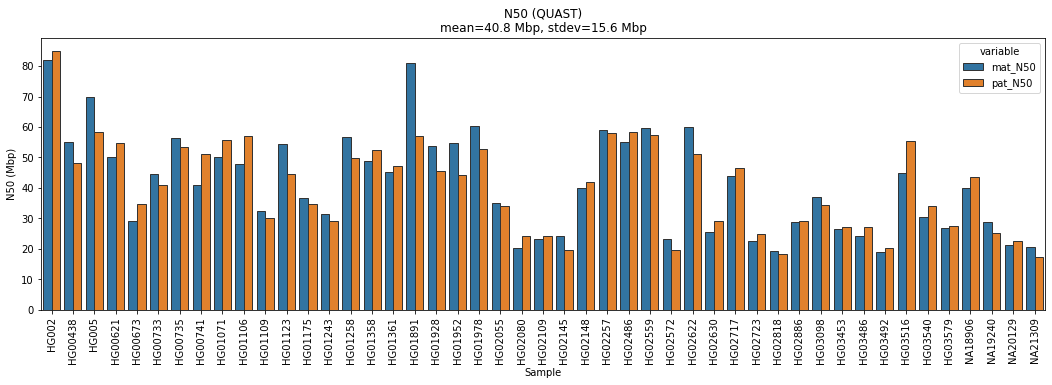

In [150]:
plt.figure(figsize = (18,5))

ax = sns.barplot(x="genbank_qc_sample_id_id", y="value_mb", hue="variable", edgecolor=".2",
                 data=n50_df)

ax.tick_params(axis='x', rotation=90)

plt.xlabel('Sample')
plt.ylabel('N50 (Mbp)')

plt.title(f"N50 (QUAST)\n{subtitle}")
plt.savefig('Y1_assemblies_N50.png', bbox_inches="tight")

## Plot Contig Counts

In [151]:
contig_count_df = pd.melt(metric_df, id_vars='genbank_qc_sample_id_id', value_vars=['mat_num_contigs', 'pat_num_contigs'])
contig_count_df['value'] = contig_count_df['value'].astype(int)

In [152]:
mean  = contig_count_df['value'].mean()
stdev = contig_count_df['value'].std()

subtitle = f"mean={mean:.0f}, stdev={stdev:.0f}"
subtitle

'mean=408, stdev=121'

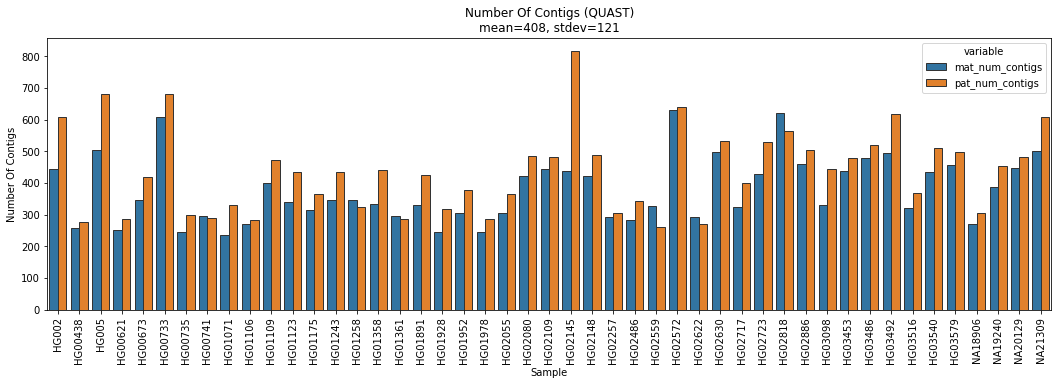

In [153]:
plt.figure(figsize = (18,5))

ax = sns.barplot(x="genbank_qc_sample_id_id", y="value", hue="variable", edgecolor=".2",
                 data=contig_count_df)

ax.tick_params(axis='x', rotation=90)

plt.xlabel('Sample')
plt.ylabel('Number Of Contigs')

plt.title(f"Number Of Contigs (QUAST)\n{subtitle}")
plt.savefig('Y1_assemblies_Contig_Count.png', bbox_inches="tight")

## Plot QV

In [154]:
QV_df = pd.melt(metric_df, id_vars='genbank_qc_sample_id_id', value_vars=['mat_qv', 'pat_qv'])
# QV_df['value'] = QV_df['value'].astype(float)

In [155]:
## remove rows that are not calculated
is_calc = QV_df['value'] != "Not_Calc"

len(QV_df['value'])
QV_df = QV_df[is_calc.values]
len(QV_df['value'])

84

In [156]:
QV_df['value'] = QV_df['value'].astype(float)

mean  = QV_df['value'].mean()
stdev = QV_df['value'].std()

subtitle = f"mean={mean:.1f}, stdev={stdev:.1f}"
subtitle

'mean=53.6, stdev=1.6'

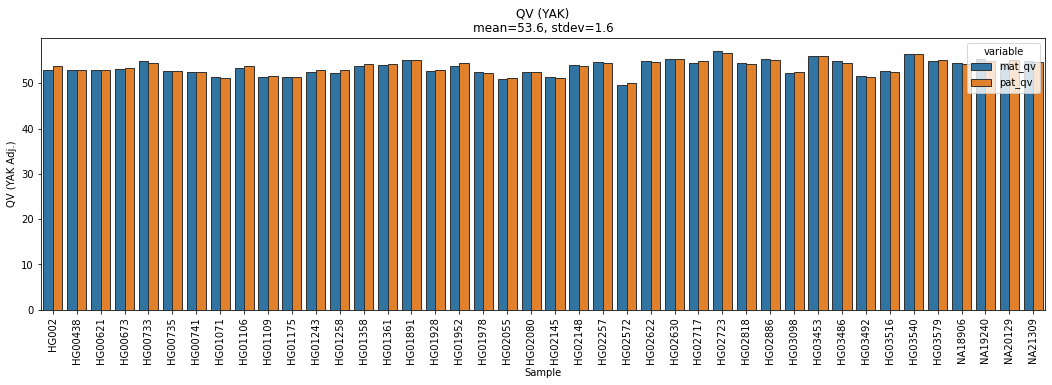

In [157]:
plt.figure(figsize = (18,5))

ax = sns.barplot(x="genbank_qc_sample_id_id", y="value", hue="variable", edgecolor=".2",
                 data=QV_df)

ax.tick_params(axis='x', rotation=90)

plt.xlabel('Sample')
plt.ylabel('QV (YAK Adj.)')

plt.title(f"QV (YAK)\n{subtitle}")
plt.savefig('Y1_assemblies_QV.png', bbox_inches="tight")

## Plot Hamming

In [158]:
hamming_df = pd.melt(metric_df, id_vars='genbank_qc_sample_id_id', value_vars=['mat_hamming_err_rate', 'pat_hamming_err_rate'])
hamming_df['value'] = hamming_df['value'].astype(float) * 100

In [159]:
mean  = hamming_df['value'].mean()
stdev = hamming_df['value'].std()

subtitle = f"mean={mean:.2f}%, stdev={stdev:.2f}%"
subtitle

'mean=0.79%, stdev=0.34%'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


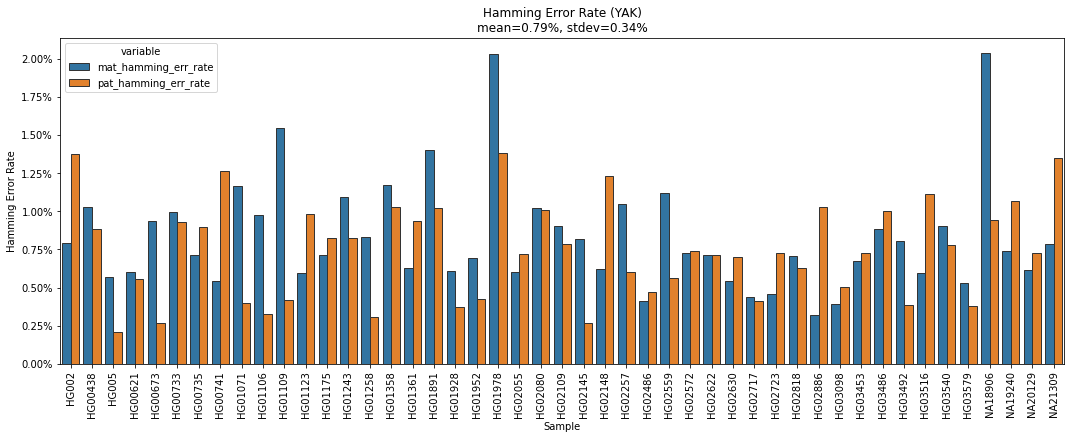

In [160]:
plt.figure(figsize = (18,6))

ax = sns.barplot(x="genbank_qc_sample_id_id", y="value", hue="variable", edgecolor=".2",
                 data=hamming_df)

ax.tick_params(axis='x', rotation=90)

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)


plt.xlabel('Sample')
plt.ylabel('Hamming Error Rate')

plt.title(f"Hamming Error Rate (YAK)\n{subtitle}")
plt.savefig('Y1_assemblies_hamming.png', bbox_inches="tight")

## Plot Switch

In [161]:
switch_df = pd.melt(metric_df, id_vars='genbank_qc_sample_id_id', value_vars=['mat_switch_err_rate', 'pat_switch_err_rate'])
switch_df['value'] = switch_df['value'].astype(float) * 100

In [162]:
mean  = switch_df['value'].mean()
stdev = switch_df['value'].std()

subtitle = f"mean={mean:.2f}%, stdev={stdev:.2f}%"
subtitle

'mean=0.67%, stdev=0.23%'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


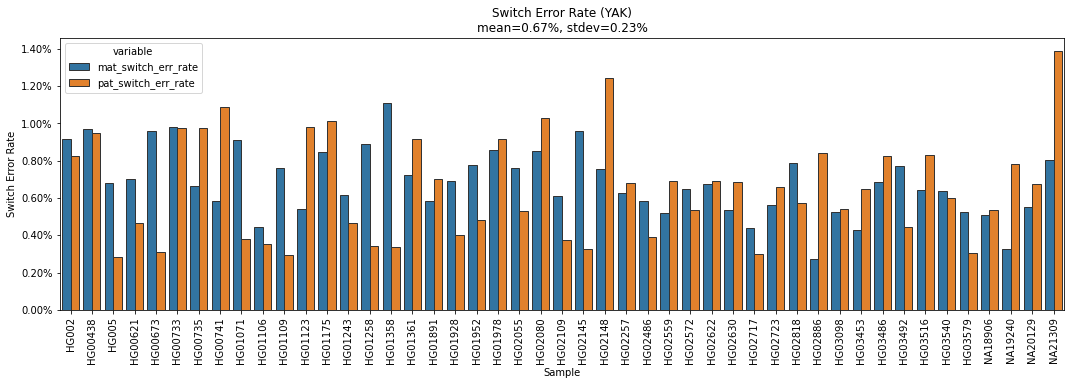

In [163]:
plt.figure(figsize = (18,5))

ax = sns.barplot(x="genbank_qc_sample_id_id", y="value", hue="variable", edgecolor=".2",
                 data=switch_df)

ax.tick_params(axis='x', rotation=90)

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)


plt.xlabel('Sample')
plt.ylabel('Switch Error Rate')

plt.title(f"Switch Error Rate (YAK)\n{subtitle}")
plt.savefig('Y1_assemblies_switch.png', bbox_inches="tight")

## Copy up to Bucket

In [167]:
! mkdir qc_charts
! mv * qc_charts/

mv: cannot move 'qc_charts' to a subdirectory of itself, 'qc_charts/qc_charts'


In [168]:
! gsutil cp -r qc_charts {bucket}qc_charts

Copying file://qc_charts/Y1_assemblies_switch.png [Content-Type=image/png]...
Copying file://qc_charts/Y1_assemblies_N50.png [Content-Type=image/png]...      
Copying file://qc_charts/Y1_assemblies_Contig_Count.png [Content-Type=image/png]...
Copying file://qc_charts/Y1_assemblies_QV.png [Content-Type=image/png]...       
- [4 files][ 95.9 KiB/ 95.9 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file://qc_charts/Y1_assemblies_hamming.png [Content-Type=image/png]...
- [5 files][124.2 KiB/124.2 KiB]                                                
Operation completed over 5 objects/124.2 KiB.                                    
